# CI - 0148  | Laboratorio
# Implementación de modelos  
Profesor:  
MSc. Felipe Meza-Obando

Estudiantes:  
Sánchez Zamora Alexander | C17325  
Chacón González Jean Paul  | C11993

# Problema

En el laboratorio anterior se llevó a cabo el preprocesado de los datos originales del dataset de [Wildfires](https://developer.ibm.com/data/spot-challenge-wildfires/), así que se partirá desde esos datos para la realización de este laboratorio.

Este dataset contiene información acerca de diversos incendios ocurridos a través de varias regiones de Australia. Existe información sobre la cantidad de área del incendio, así como energía y brillo irradiados por el mismo. Además, se encuentran registrados datos climatológicos como Precipitación, Humedad, Temperatura o Velocidad del viento al momento del incidente.

El objetivo de este laboratorio es predecir cuanta área tendría un incendio específico, tomando en cuenta los diferentes atributos mencionados anteriormente.

## Importación de Datos

Se comenzará por la importación de los datos anteriormente procesados:

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/AlexBeanie/machine_learning_CI-0148/refs/heads/main/Lab2/ProcessedFireData.csv")
data.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Precipitation,RelativeHumidity,SoilWaterContent,SolarRadiation,Temperature,WindSpeed
0,0,04/01/2005,-0.431359,-0.837048,-0.609062,-2.037880,-2.287676,-1.940798,-0.457521,1,0.883674,0.447914,0.957292,0.362612,0.251980,1.176793
1,0,05/01/2005,-0.406057,0.312121,-0.314524,-0.475382,0.427537,0.358861,-0.424313,1,-0.407303,-0.233756,0.819185,1.269009,0.156911,0.290884
2,0,06/01/2005,-0.441439,0.626384,-0.668080,-2.114100,-2.116581,-1.860243,-0.457521,1,-0.272444,-0.734872,0.681865,1.681548,-0.115477,0.787310
3,0,07/01/2005,-0.439066,-0.656559,-0.735951,1.056629,0.135843,0.007295,-0.444238,1,-0.452944,-0.775754,0.549799,1.944195,-0.264729,0.294628
4,0,08/01/2005,-0.441822,1.990377,0.573270,0.782239,0.348441,0.261044,-0.457521,1,-0.385184,-0.561367,0.445049,1.480001,0.013732,0.152242


Es destacable notar que los valores de **Region** ahora son números, sin embargo su significado verdadero es el siguiente:

| Número | Nombre de Región |
|--------|-------------|
| 0      | NSW         |
| 1      | NT          |
| 2      | QL          |
| 3      | SA          |
| 4      | TA          |
| 5      | VI          |
| 6      | WA          |

De igual manera, la columna **Replaced** cuenta con la siguiente simbolización:

| Número | Valor de 'Replaced' |
|--------|-------------|
| 0      | N         |
| 1      | R          |

## Separación de datos y selección de características

Se separarán los datos en 4 partes:

- **Conjunto de Entrenamiento (training set):**
    - `X_train` (*features* de entrenamiento)
    - `y_train` (*target* de entrenamiento)
- **Conjunto de Pruebas (test set):**
    - `X_test` (*features* de pruebas)
    - `y_test` (*target* de pruebas)

In [ ]:
from sklearn.model_selection import train_test_split


y = data['Estimated_fire_area']

selected_features = ['Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power', 'RelativeHumidity', 'SoilWaterContent']

X = data[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Selección de Algoritmos

## Regresión lineal

Se utilizará regresión lineal como modelo base, esto debido a su simplicidad y facilidad de uso con respecto a al conjunto de datos.

## KNN

KNN es uno de los modelos más simples y fáciles de implementar, además de que se adapta bastante bien a casi cualquier tipo de datos. Si bien es cierto que puede llegar a tener problemas con datos una dimensionalidad alta, dado que sólamente se usarán 4 *features*, este no es un inconveniente en nuestro caso.

KNN posee un hiper-parámetro, que es la cantidad de vecinos a utilizar.

## Random Forest

Random Forest es un modelo bastante más complejo que Regresión Lineal o KNN. Además, dado que Random Forest promedia los resultados de cada árbol de decisión, es más difícil que se caiga en sobre-ajuste. Es importante recordar que este modelo tiene 3 hiper-parámetros:
- la cantidad de árboles utilizados
- el número de *features* muestreados
- el tamaño de los nodos.

## Gradient Boosting

`Gradient Boosting` es un modelo de machine learning que puede utilizarse tanto para regresión como clasificación de variables de respuesta. Este modelo funciona utilizando una gran cantidad de *modelos débiles* para poder construir un modelo más fuerte.


Se basa en la ideología de que se deben *tomar pequeños pasos hacia el camino correcto* y que si se realiza esto muchas veces, se puede generar una buena predicción de los datos. En general, esta es la metodología de trabajo de los modelos ensamblados. Para este caso específico, se utilizará como modelo base árboles de decisión.


### Funcionamiento

Para tareas de regresión, el modelo funciona de la siguiente manera:

1. Se toma el promedio de la variable de respuesta como primera predicción.
2. Se calculan las diferencias entre las variables de respuesta y el valor predicho (inicialmente el promedio), estos valores son llamados *pseudo-residuales*.
3. Se crea un árbol de decisión utilizando como variable de respuesta a los pseudo-residuales.
4. Realiza esto en bucle hasta llegar al valor máximo establecido de árboles ó hasta que no se encuentre una reducción significativa en los residuales.

La forma en la que se realizan predicciones basadas en los pseudo-residuales es que se toma la primera predicción (el promedio), y se le suman los valores de los pseudo-residuales presentes en el árbol de decisión.

Para prevenir overfitting, este modelo utiliza un hiperparámetro llamado *tasa de aprendizaje*, el cual es un valor entre 0 y 1 que aplica a cada árbol por igual y mide la influencia que tiene el valor del árbol de decisión sobre la predicción final. La tasa de aprendizaje se multiplica con el valor resultante de cada árbol de decisión.

Cuando se cuenta con múltiples árboles, se suman los valores de todos los árboles (con la tasa de aprendizaje incluida), junto con el promedio de los datos iniciales. Esto anterior, genera el valor de predicción del modelo total.

En este modelo, cada árbol que se genera busca disminuir el tamaño de los pseudo-residuales.

Los otros hiperparámetros con los que cuenta este modelo son:

- Cantidad de árboles a generar
- Profundidad máxima de los árboles

## Bagging

El término `Bagging` hace referencia a la técnica que consta de implementar varias instancias del mismo modelo con un subconjunto aleatorio del mismo conjunto de datos de entrenamiento original. Posteriormente, se agregan cada una de las predicciones individuales para formar una predicción final. Este método es una buena forma de reducir la varianza de una estimación, además de mejorar su rendimiento.

Debido a la gran cantidad de `outliers` presentes en el `dataset`, se considera oportuno implementar esta técnica con tal de reducir la cantidad de ruido (que afecta a KNN simple), y mejorar la capacidad de predicción del modelo. A modo de comparación, se tomará uno de los modelos anteriores para la implementación del `Bagging`.

Dado que `Random Forest` es también una forma de entrenamiento ensamblado, no se utilizará como modelo objetivo para `Bagging`. Es por esto que se utilizará a `KNN` como modelo objetivo para esta estrategia.

### Funcionamiento

`Bagging` funciona mediante tres simples pasos:
1. De los datos de entrenamiento originales, se seleccionan aleatoriamente y con reemplazo, un subconjunto de datos para entrenar a uno de los modelos. Esto quiere decir que en un mismo subconjunto, cabe la posibilidad de que existan datos repetidos. Esta selección se repite por cada uno de los modelos a implementar.
2. Cada modelo se entrena independientemente y en paralelo a los otros.
3. Finalmente, se retorna una predicción dependiendo de los resultados de cada modelo. En el caso de regresión, se retorna el promedio de todas las predicciones (*soft voting*). En caso de hacer clasificación, entonces se retorna la clase con la mayoría de los votos (*hard voting*)

### Boosting vs. Bagging

Es importante mencionar que `Bagging` y `Boosting` son distintos métodos, ya que:

- `Bagging` reduce la `varianza` (previene el sobre-ajuste)
- `Bagging` usa muestreo con reemplazo, mientras que `Boosting` no
- Durante `Boosting` los modelos se entrenan secuencialmente (para arreglar los errores cometidos anteriormente), por otro lado,
`Bagging` entrena a los modelos independientemente.

# 4. Entrenamiento y Evaluación de los Modelos

Dado que el problema planteado es un problema de regresión, se han seleccionado las siguientes métricas para evaluar el rendimiento de los modelos:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

La decisión de utilizar estas tres métricas responde a diferentes aspectos del comportamiento de los modelos. El MAE es útil para evaluar el error promedio absoluto, lo que permite conocer el rendimiento del modelo sin dar un peso adicional a los errores grandes o pequeños, es decir, es una métrica menos sensible a los valores atípicos.

Por otro lado, el MSE y el RMSE proporcionan métricas que penalizan los errores grandes, siendo más sensibles a los valores atípicos. Esto es relevante debido a la presencia de varios *outliers* en el dataset original. En este caso se preferiría incluir el RMSE porque, al estar en la misma escala que los datos originales, es más fácilmente interpretable en comparación con el MSE, que presenta los errores elevados al cuadrado.

En general, se utilizarán los 3 para propósitos comparativos.

Se importarán las funciones de `scikit-learn` para el cálculo de métricas:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

También se importará la librería para hacer *cross-validation* con los modelos:

In [ ]:
from sklearn.model_selection import GridSearchCV

Para medir el tiempo de ejecución se utilizará la librería `time`

In [ ]:
import time

## Regresión lineal

Para iniciar con la realización de la regresión lineal, se necesitarán importar las siguientes librerías:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

Se entrena el modelo de regresión lineal usando los datos de *train*:

In [ ]:
model_lr = LinearRegression()

start_time = time.time()
model_lr.fit(X_train, y_train)
end_time = time.time()

Se realizan predicciones sobre el *test set* usando el modelo entrenado:

In [ ]:
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_train = model_lr.predict(X_train)

Calculando las métricas para calcular el rendimiento del modelo de regresión lineal:

In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
print("Mean Absolute Error (MAE) de Regresión Lineal (test set):", mae_lr)
print("Mean Absolute Error (MAE) de Regresión Lineal (train set):", mae_lr_train)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
print("Mean Squared Error (MSE) de Regresión Lineal (test set):", mse_lr)
print("Mean Squared Error (MSE) de Regresión Lineal (train set):", mse_lr_train)

rmse_lr = np.sqrt(mse_lr)
rmse_lr_train = np.sqrt(mse_lr_train)
print("Root Mean Squared Error (RMSE) de Regresión Lineal (test set):", rmse_lr)
print("Root Mean Squared Error (RMSE) de Regresión Lineal (train set):", rmse_lr_train)

print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")

Mean Absolute Error (MAE) de Regresión Lineal (test set): 0.311186053440148
Mean Absolute Error (MAE) de Regresión Lineal (train set): 0.3094534043049928
Mean Squared Error (MSE) de Regresión Lineal (test set): 0.21852652591493654
Mean Squared Error (MSE) de Regresión Lineal (train set): 0.21202202885551263
Root Mean Squared Error (RMSE) de Regresión Lineal (test set): 0.46746820845372633
Root Mean Squared Error (RMSE) de Regresión Lineal (train set): 0.46045849851589515
Tiempo de entrenamiento: 0.03149724006652832 segundos


## KNN

Para poder implementar el modelo de KNN, primero se debe importar la librería `KNeighborsRegressor`, para poder utilizar regresión con este modelo.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Una vez importado ahora se puede entrenar el modelo con los datos ya dividios anteriormente.

Sin embargo, antes se aplicará cross validation:

In [ ]:
model_knn = KNeighborsRegressor()
param_grid = {
    # 11 or lower lead to overfitting, so we try higher values
    'n_neighbors': [15, 18, 21]
}
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

In [ ]:
print(f"Mejores parámetros encontrados por cv: {grid_search.best_params_}")

Mejores parámetros encontrados por cv: {'n_neighbors': 21}


Ya con el modelo entrenado, es posible realizar las predicciones con el conjunto de pruebas.

In [ ]:
y_pred_knn = grid_search.predict(X_test)
y_pred_knn_train = grid_search.predict(X_train)

Los resultados de la prueba se analizarán con las métricas de `MAE`, `MSE` y `RMSE`

In [ ]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_knn_train = mean_absolute_error(y_train, y_pred_knn_train)
print("Mean Absolute Error (MAE) de KNN (test set):", mae_knn)
print("Mean Absolute Error (MAE) de KNN (train set):", mae_knn_train)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_knn_train = mean_squared_error(y_train, y_pred_knn_train)
print("Mean Squared Error (MSE) de KNN (test set):", mse_knn)
print("Mean Squared Error (MSE) de KNN (train set):", mse_knn_train)

rmse_knn = np.sqrt(mse_knn)
rmse_knn_train = np.sqrt(mse_knn_train)
print("Root Mean Squared Error (RMSE) de KNN (test set):", rmse_knn)
print("Root Mean Squared Error (RMSE) de KNN (train set):", rmse_knn_train)

print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")

Mean Absolute Error (MAE) de KNN (test set): 0.2479716112529561
Mean Absolute Error (MAE) de KNN (train set): 0.2395269102506754
Mean Squared Error (MSE) de KNN (test set): 0.17505397211535081
Mean Squared Error (MSE) de KNN (train set): 0.15949447068670414
Root Mean Squared Error (RMSE) de KNN (test set): 0.4183945173103381
Root Mean Squared Error (RMSE) de KNN (train set): 0.3993675884278845
Tiempo de entrenamiento: 4.085047483444214 segundos


Como se puede ver el MAE (0.2479) indica que el error promedio de las predicciones es de 0.2479 unidades, lo que es un buen resumen de los errores generales del modelo. El MSE (0.1750) sugiere que el modelo tiene algunos errores más grandes, ya que esta métrica eleva al cuadrado los errores. Esto es confirmado por el RMSE (0.4183), debido a su diferencia respecto al MAE.

## Random Forest

Para poder implementar el modelo de Random Forest, primero se debe importar la librería `RandomForestRegressor`, para poder utilizar regresión con este modelo.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Una vez importado ahora se puede entrenar el modelo con los datos ya dividios anteriormente.

In [ ]:
model_rf = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 10, 20, None],
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print(f"Mejores parámetros encontrados por cv: {grid_search.best_params_}")

Mejores parámetros encontrados por cv: {'max_depth': 10, 'n_estimators': 300}


Ya con el modelo entrenado, es posible realizar las predicciones con el conjunto de pruebas.

In [ ]:
y_pred_rf = grid_search.predict(X_test)
y_pred_rf_train = grid_search.predict(X_train)

Los resultados de la prueba se analizarán con las métricas de `MAE`, `MSE` y `RMSE`

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf_train = mean_absolute_error(y_train, y_pred_rf_train)
print("Mean Absolute Error (MAE) de Random Forest (test set):", mae_rf)
print("Mean Absolute Error (MAE) de Random Forest (train set):", mae_rf_train)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
print("Mean Squared Error (MSE) de Random Forest (test set):", mse_rf)
print("Mean Squared Error (MSE) de Random Forest (train set):", mse_rf_train)

rmse_rf = np.sqrt(mse_rf)
rmse_rf_train = np.sqrt(mse_rf_train)
print("Root Mean Squared Error (RMSE) de Random Forest (test set):", rmse_rf)
print("Root Mean Squared Error (RMSE) de Random Forest (train set):", rmse_rf_train)

print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")

Mean Absolute Error (MAE) de Random Forest (test set): 0.2432042969747183
Mean Absolute Error (MAE) de Random Forest (train set): 0.21564534858357365
Mean Squared Error (MSE) de Random Forest (test set): 0.16996772035723856
Mean Squared Error (MSE) de Random Forest (train set): 0.13212035180946444
Root Mean Squared Error (RMSE) de Random Forest (test set): 0.41227141588671723
Root Mean Squared Error (RMSE) de Random Forest (train set): 0.36348363348225793
Tiempo de entrenamiento: 1290.6596636772156 segundos


Como se puede ver el MAE (0.2601) indica que el error promedio de las predicciones es de 0.2601 unidades, lo que es un buen resumen de los errores generales del modelo. El MSE (0.2000) sugiere que el modelo tiene algunos errores más grandes, ya que esta métrica eleva al cuadrado los errores. Esto es confirmado por el RMSE (0.4473), debido a su diferencia respecto al MAE.

## Gradient Boosting

Antes de iniciar con **Gradient Boosting**, se importarán las librerías necesarias:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Ahroa se creará el Gradient Boosting Regressor con una cantidad de *aprendices* de 100 (elegido aleatoriamente), una *tasa de aprendizaje* de 0.1 y una profundidad máxima (profundidad a la que pueden llegar los aprendices como máximo) de 3.

*Nota: se utilizará random_state=42 para que los datos sean reproducibles en el caso actual.*

In [ ]:
model_gb = GradientBoostingRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6, 8],
}

grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=5, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

In [ ]:
print(f"Mejores parámetros encontrados por cv: {grid_search.best_params_}")

Mejores parámetros encontrados por cv: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


Una vez entrenado el modelo, se evaluará su capacidad de realizar predicciones de manera similar a los datos observados en el conjunto de pruebas:

In [ ]:
y_pred_gb = grid_search.predict(X_test)
y_pred_gb_train = grid_search.predict(X_train)

In [ ]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mae_gb_train = mean_absolute_error(y_train, y_pred_gb_train)
print("Mean Absolute Error (MAE) de Gradient Boosting (test set):", mae_gb)
print("Mean Absolute Error (MAE) de Gradient Boosting (train set):", mae_gb_train)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_gb_train = mean_squared_error(y_train, y_pred_gb_train)
print("Mean Squared Error (MSE) de Gradient Boosting (test set):", mse_gb)
print("Mean Squared Error (MSE) de Gradient Boosting (train set):", mse_gb_train)

rmse_gb = np.sqrt(mse_gb)
rmse_gb_train = np.sqrt(mse_gb_train)
print("Root Mean Squared Error (RMSE) de Gradient Boosting (test set):", rmse_gb)
print("Root Mean Squared Error (RMSE) de Gradient Boosting (train set):", rmse_gb_train)

print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")

Mean Absolute Error (MAE) de Gradient Boosting (test set): 0.24361027892750808
Mean Absolute Error (MAE) de Gradient Boosting (train set): 0.23367610543583694
Mean Squared Error (MSE) de Gradient Boosting (test set): 0.16924286956561946
Mean Squared Error (MSE) de Gradient Boosting (train set): 0.15050893561687254
Root Mean Squared Error (RMSE) de Gradient Boosting (test set): 0.41139138246397366
Root Mean Squared Error (RMSE) de Gradient Boosting (train set): 0.38795481130780235
Tiempo de entrenamiento: 2530.056647539139 segundos


## Bagging

Para implementar `Bagging` se debe importar la librería `BaggingRegressor`

In [ ]:
from sklearn.ensemble import BaggingRegressor

Ahora es necesario entrenar el modelo, indicándole qué hiper-parámetros se utilizarán:
- Modelo de aprendizaje debe utilizar (`estimator`)
- Cuántos debe utilizar (`n_estimators`)
- La cantidad de muestras por grupo (`max_samples`)
- La cantidad de features por grupo (`max_features`)

In [ ]:
base_regressor = KNeighborsRegressor()
model_bag = BaggingRegressor(estimator=base_regressor, random_state=42)

In [ ]:
param_grid = {
    # 300, 350 and 400 led to overfitting
    'n_estimators': [10, 20, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'estimator__n_neighbors': [3, 5, 7, 9, 15, 18, 21]
}

grid_search = GridSearchCV(estimator=model_bag, param_grid=param_grid, cv=5, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
print(f"Mejores parámetros encontrados por cv: {grid_search.best_params_}")

Mejores parámetros encontrados por cv: {'estimator__n_neighbors': 21, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}


Ahora es posible realizar una prueba sobre el modelo

In [ ]:
y_pred_bag = grid_search.predict(X_test)
y_pred_bag_train = grid_search.predict(X_train)

Se procede a verificar los resultados

In [ ]:
mae_bag = mean_absolute_error(y_test, y_pred_bag)
mae_bag_train = mean_absolute_error(y_train, y_pred_bag_train)
print("Mean Absolute Error (MAE) de Bagging (test set):", mae_bag)
print("Mean Absolute Error (MAE) de Bagging (train set):", mae_bag_train)

mse_bag = mean_squared_error(y_test, y_pred_bag)
mse_bag_train = mean_squared_error(y_train, y_pred_bag_train)
print("Mean Squared Error (MSE) de Bagging (test set):", mse_bag)
print("Mean Squared Error (MSE) de Bagging (train set):", mse_bag_train)

rmse_bag = np.sqrt(mse_bag)
rmse_bag_train = np.sqrt(mse_bag_train)
print("Root Mean Squared Error (RMSE) de Bagging (test set):", rmse_bag)
print("Root Mean Squared Error (RMSE) de Bagging (train set):", rmse_bag_train)

print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")

Mean Absolute Error (MAE) de Bagging (test set): 0.2488024693453452
Mean Absolute Error (MAE) de Bagging (train set): 0.24581325847807242
Mean Squared Error (MSE) de Bagging (test set): 0.1729847472301606
Mean Squared Error (MSE) de Bagging (train set): 0.16452281442194988
Root Mean Squared Error (RMSE) de Bagging (test set): 0.41591435083459266
Root Mean Squared Error (RMSE) de Bagging (train set): 0.4056141200968599
Tiempo de entrenamiento: 3731.4087150096893 segundos


# 5. Benchmarking de los Modelos

Ahora se realizará una comparación de los modelos utilizando una tabla comparativa con los resultados de las diferentes métricas utilizadas para evaluar el conjunto de prueba.

|       Modelo      |         MAE         |         MSE         |         RMSE        |         Tiempo (min)        |
| ----------------- | ------------------- | ------------------- | ------------------- |------------------- |
|  Regresión Lineal |  0.31119 | 0.21853 | 0.46747 | 0.00053 |
|        KNN        |  0.24798 | 0.17505 | 0.41839 | 0.06808 |
|   Random Forest   |  0.24320 | 0.16997 | 0.41227 | 21.51100 |
| Gradient Boosting |  0.24361 | 0.16924 | 0.41139 | 42.16761 |
|      Bagging      |  0.24880 | 0.17298 | 0.41227 | 62.19015 |

En general los modelos tienen ligeras diferencias entre sí, ninguno sobrepasando la unidad de error. Esto quiere decir, que todos los modelos se equivocan al calcular el área afectada por los incendios por menos de un kilómetro cuadrado. Para visualizar mejor estos datos, se realizarán gráficos utilizando la librería `matplotlib`:

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7dc0e4e18df0>,
 [Text(0, 0, 'Regresión Lineal'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'RF'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Bagging')])

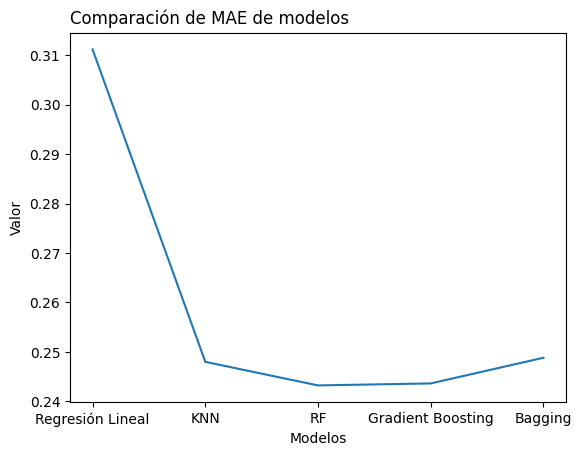

In [ ]:
plot_mae = np.array([mae_lr, mae_knn, mae_rf, mae_gb, mae_bag])

plt.plot(plot_mae)

plt.title("Comparación de MAE de modelos", loc = 'left')
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Regresión Lineal","KNN","RF","Gradient Boosting","Bagging"])

En este gráfico se puede ver cómo Regresión Lineal tiene el MAE más alto de todos los modelos. También se puede apreciar cómo KNN y Bagging tienen valores similiares. Lo mismo se puede observar para Random Forest y Gradient Boosting.

([<matplotlib.axis.XTick at 0x7dc0e4318f40>,
 [Text(0, 0, 'Regresión Lineal'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'RF'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Bagging')])

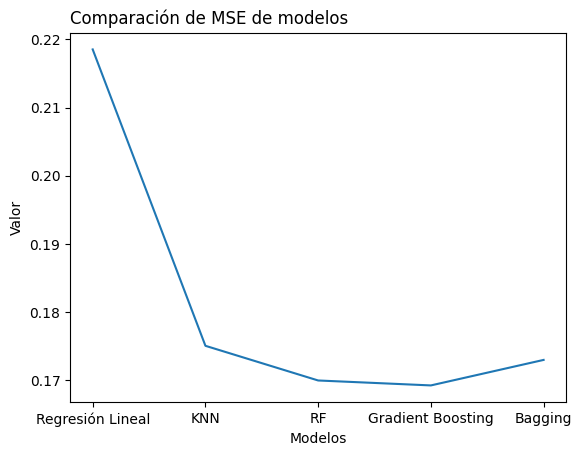

In [ ]:
plot_mse = np.array([mse_lr, mse_knn, mse_rf, mse_gb, mse_bag])

plt.plot(plot_mse)

plt.title("Comparación de MSE de modelos", loc = 'left')
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Regresión Lineal","KNN","RF","Gradient Boosting","Bagging"])

Dado que MSE castiga más los errores, era de esperarse que el comportamiento de los modelos fuera similar. En efecto, Rregresión Lineal sigue siendo el modelo con los valores más altos, seguido por KNN y Bagging.

([<matplotlib.axis.XTick at 0x7dc0e434cac0>,
 [Text(0, 0, 'Regresión Lineal'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'RF'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Bagging')])

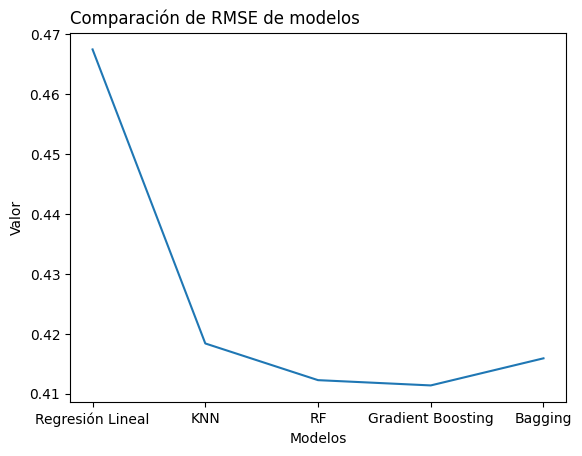

In [ ]:
plot_rmse = np.array([rmse_lr, rmse_knn, rmse_rf, rmse_gb, rmse_bag])

plt.plot(plot_rmse)

plt.title("Comparación de RMSE de modelos", loc = 'left')
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Regresión Lineal","KNN","RF","Gradient Boosting","Bagging"])

El comportamiento anterior es replicado en RMSE, puesto que son los valores de MSE, pero aplicándoles la operación de raíz cuadrada.

## Discusión

Al observar la tabla y los gráficos de las métricas calculadas, se puede ver que el orden ascendente en términos de MAE, MSE y RMSE es el siguiente:

1. Gradient Boosting  
2. Random Forest  
3. Bagging  
4. KNN  
5. Regresión Lineal  

El rendimiento de los modelos concuerda con la teoría que respalda su funcionamiento. En primer lugar, Gradient Boosting es el modelo que mejor se desempeña, lo cual es esperable debido a su capacidad para corregir los errores de los árboles anteriores, ajustándose mejor a las relaciones no lineales entre los datos. Esto le permite capturar patrones complejos de manera más precisa.

El buen rendimiento de Random Forest y Bagging se debe a su enfoque de ensamblado, que combina múltiples modelos para generar predicciones más robustas y mitigar el sobreajuste. Random Forest es una especialización de Bagging, ya que entrena varios árboles de decisión en paralelo. La diferencia de rendimiento entre ambos podría deberse a que los árboles de decisión son más efectivos para este conjunto de datos.

El hecho de tener que entrenar múltiples modelos base puede que juegue un papel importante en la elección de uno de estos modelos de predicción, en cuestión de tiempo. El tiempo de entrenamiento de Random Forest, Gradient Boosting y Bagging fue de aproximadamente 20, 40 y 60 minutos, respectivamente.

KNN y Bagging muestran un rendimiento similar. Esto puede deberse a la cantidad de muestras utilizadas en Bagging, ya que se está aplicando un muestreo *bootstrap* del 50% de las muestras y el 50% de las *features*. Bagging generalmente mejora modelos inestables, por lo que su impacto en KNN, que es más estable, es más limitado en este caso.

Regresión Lineal obtuvo el peor rendimiento, lo cual es esperable debido a su naturaleza lineal, que dificulta capturar relaciones no lineales en los datos complejos.

# 6. Documentación y Análisis

En resumen, todos los modelos lograron un MAE en el rango de 0.25 a 0.30, lo que indica un buen rendimiento general en los casos promedio. Sin embargo, el RMSE se mantuvo en rangos de 0.40 a 0.50, lo cual sugiere que los modelos tienen dificultades para predecir con precisión en presencia de datos atípicos o extremos.

Es posible que un mayor ajuste de los hiperparámetros de los modelos pudiera mejorar su rendimiento. Como por ejemplo, utilizar una lista de vecinos más grande para KNN y así tener más opciones para revisar la cantidad más óptima. O también usar un modelo base diferente para Bagging.

Además, dado el comportamiento observado, sería conveniente revisar el preprocesamiento de los datos, pues el impacto de los datos atípicos es notable. Otra opción a considerar es la reducción de dimensionalidad, la cual podría disminuir el ruido y mejorar la generalización de los modelos, dado que en este caso solo se utilizaron atributos con mayor correlación sobre la variable de respuesta.

Otro punto a tomar en cuenta es el tiempo de entrenamiento. En los modelos ensamblados el tiempo de entrenamiento se llega a disparar hasta un 375% más que con un modelo base normal. Random Forest y KNN son recomendables por su balance entre precisión y tiempo de entrenamiento. Random Forest ofrece un buen rendimiento con tiempos razonables (300 árboles en 20 minutos), mientras que KNN, aunque ligeramente menos preciso, es significativamente más rápido (4 segundos).

En conclusión, se implementaron cinco modelos diferentes con el fin de predecir el área afectada por un incendio forestal, tomando en cuenta datos satelitales y climatológicos. De estos cinco modelos, los que tuvieron un mejor desempeño fueron Gradient Boosting y Random Forest, sin embargo, junto con Bagging fueron los que más tiempo de entrenamiento requirieron. KNN utilizó un tiempo moderado de tiempo, con resultados razonables, mientras que Regresión Lineal fue el que tuvo peor rendimiento.